In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing housing_drop_impute_tr file that I created in R after selecting for variables based on VIF, BIC, and original analysis from before.
housing_drop_impute_tr = pd.read_csv('housing_drop_impute_tr.csv', index_col=0)

In [3]:
housing_drop_impute_tr1 = housing_drop_impute_tr.copy()

In [4]:
# Dropped the original continuous variables because they were transformed in R and the dataframe contains transformed version of them
housing_drop_impute_tr = housing_drop_impute_tr.drop("SalePrice", axis =1)
housing_drop_impute_tr = housing_drop_impute_tr.drop("BsmtFinSF1", axis =1)
housing_drop_impute_tr = housing_drop_impute_tr.drop("BsmtUnfSF", axis =1)
housing_drop_impute_tr = housing_drop_impute_tr.drop("GarageArea", axis =1)
housing_drop_impute_tr = housing_drop_impute_tr.drop("LotArea", axis =1)
housing_drop_impute_tr = housing_drop_impute_tr.drop("LowQualFinSF", axis =1)
housing_drop_impute_tr = housing_drop_impute_tr.drop("MasVnrArea", axis =1)
housing_drop_impute_tr = housing_drop_impute_tr.drop("TotalBsmtSF", axis =1)
housing_drop_impute_tr = housing_drop_impute_tr.drop("X1stFlrSF", axis =1)
housing_drop_impute_tr = housing_drop_impute_tr.drop("X2ndFlrSF", axis =1)
housing_drop_impute_tr = housing_drop_impute_tr.drop("LotFrontage", axis =1)

In [5]:
#Ordinal Encoding of certain features
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Nb']])
housing_drop_impute_tr[["BsmtQual"]]= enc.fit_transform(housing_drop_impute_tr[["BsmtQual"]])
housing_drop_impute_tr[["KitchenQual"]]= enc.fit_transform(housing_drop_impute_tr[["KitchenQual"]])
housing_drop_impute_tr[["HeatingQC"]]= enc.fit_transform(housing_drop_impute_tr[["HeatingQC"]])
enc = OrdinalEncoder(categories=[['Gd', 'Av', 'Mn', 'No', 'Nb']])
housing_drop_impute_tr[["BsmtExposure"]]= enc.fit_transform(housing_drop_impute_tr[["BsmtExposure"]])
enc = OrdinalEncoder(categories=[['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2','Sev','Sal']])
housing_drop_impute_tr[["Functional"]]= enc.fit_transform(housing_drop_impute_tr[["Functional"]])
enc = OrdinalEncoder(categories=[['N', 'Y']])
housing_drop_impute_tr[["CentralAir"]]= enc.fit_transform(housing_drop_impute_tr[["CentralAir"]])

In [6]:
#Nominal Variables Dummified
# Neighborhood
neighbor = pd.get_dummies(housing_drop_impute_tr['Neighborhood'], prefix = 'Neighbor', prefix_sep='-')
neighbor = neighbor.drop('Neighbor-' + str(housing_drop_impute_tr['Neighborhood'].mode()[0]), axis=1)
housing_drop_impute_tr =pd.concat([housing_drop_impute_tr.drop("Neighborhood", axis =1), neighbor], axis =1)
# Sale Condition
salec = pd.get_dummies(housing_drop_impute_tr['SaleCondition'], prefix = 'SaleCond', prefix_sep='-')
salec= salec.drop('SaleCond-' + str(housing_drop_impute_tr['SaleCondition'].mode()[0]), axis=1)
housing_drop_impute_tr =pd.concat([housing_drop_impute_tr.drop("SaleCondition", axis =1), salec], axis =1)
# MSZoning
mszone = pd.get_dummies(housing_drop_impute_tr['MSZoning'], prefix = 'MSZoning', prefix_sep='-')
mszone = mszone.drop('MSZoning-' + str(housing_drop_impute_tr['MSZoning'].mode()[0]), axis=1)
housing_drop_impute_tr =pd.concat([housing_drop_impute_tr.drop("MSZoning", axis =1), mszone], axis =1)
#Condition1
condition1 = pd.get_dummies(housing_drop_impute_tr['Condition1'], prefix = 'Condition1', prefix_sep='-')
condition1 = condition1.drop('Condition1-' + str(housing_drop_impute_tr['Condition1'].mode()[0]), axis=1)
housing_drop_impute_tr =pd.concat([housing_drop_impute_tr.drop("Condition1", axis =1), condition1], axis =1)
#Condition2
condition2 = pd.get_dummies(housing_drop_impute_tr['Condition2'], prefix = 'Condition2', prefix_sep='-')
condition2 = condition2.drop('Condition2-' + str(housing_drop_impute_tr['Condition2'].mode()[0]), axis=1)
housing_drop_impute_tr =pd.concat([housing_drop_impute_tr.drop("Condition2", axis =1), condition2], axis =1)

In [7]:
# Multiple Linear Regression import packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
#Separating X and y variables
modelX = housing_drop_impute_tr.drop("logSalePrice", axis =1)
modely = housing_drop_impute_tr["logSalePrice"]

In [9]:
list(modelX.columns)

['Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'X3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'Fence',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'sqrtBsmtFinSF1',
 'sqrtBsmtUnfSF',
 'logGarageArea',
 'logLotArea',
 'flLowQualFinSF',
 'logMasVnrArea',
 'logTotalBsmt

In [10]:
#Split into test and train sets
modelX_train, modelX_test, modely_train, modely_test = train_test_split(modelX, modely, random_state=2, test_size=0.2)

In [11]:
# Created a simplest model containing just the continuous features
simplestX_train = modelX_train[["sqrtBsmtFinSF1","sqrtBsmtUnfSF","logGarageArea","logLotArea","flLowQualFinSF","logMasVnrArea","logTotalBsmtSF","log1stFlrSF","fl2ndFlrSF","YearBuilt","YearRemodAdd"]]
simplestX_test = modelX_test[["sqrtBsmtFinSF1","sqrtBsmtUnfSF","logGarageArea","logLotArea","flLowQualFinSF","logMasVnrArea","logTotalBsmtSF","log1stFlrSF","fl2ndFlrSF","YearBuilt","YearRemodAdd"]]
simplesty_train = modely_train.copy()
simplesty_test = modely_test.copy()

In [12]:
# Simplest Model linear regression
simple_ols = LinearRegression()
simple_ols.fit(simplestX_train, simplesty_train)

LinearRegression()

In [13]:
#Scores for train and test sets
print("R^2 for train set: %f" %simple_ols.score(simplestX_train, simplesty_train))

print('-'*50)

print("R^2 for test  set: %f" %simple_ols.score(simplestX_test, simplesty_test))

R^2 for train set: 0.825353
--------------------------------------------------
R^2 for test  set: 0.830462


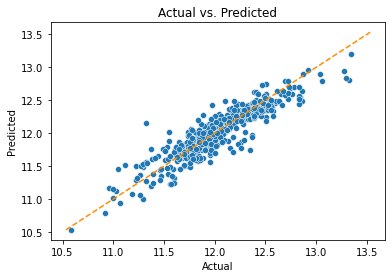

In [14]:
# Testing Linearity
predictions = simple_ols.predict(simplestX_test)
results = pd.DataFrame({"Actual": simplesty_test, "Predicted": predictions})
results['Residuals'] = abs(results['Actual']) - abs(results['Predicted'])
sns.scatterplot(x='Actual', y='Predicted', data=results)
line_coords = np.arange(results[['Actual', 'Predicted']].min().min(), results[['Actual', 'Predicted']].max().max()+1)
plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

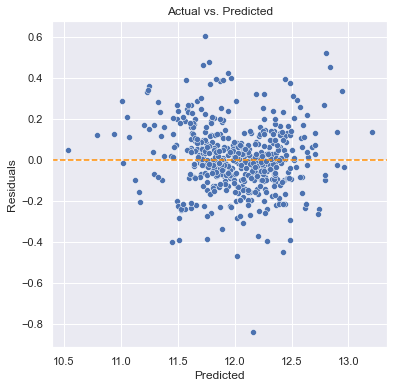

In [15]:
# Checking for constant variance
sns.set(rc={'figure.figsize':(6,6)})
sns.scatterplot(x='Predicted', y ='Residuals', data = results)
plt.axhline(y = 0, color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

In [16]:
# Selecting variables for Model 2
model72X_train = modelX_train[["TotRmsAbvGrd", "BsmtExposure", "sqrtBsmtFinSF1", "BsmtQual", "Fireplaces", "Functional", "logGarageArea", "KitchenQual", "logLotArea", "flLowQualFinSF", 'Neighbor-Blmngtn','Neighbor-Blueste','Neighbor-BrDale','Neighbor-BrkSide','Neighbor-ClearCr','Neighbor-CollgCr','Neighbor-Crawfor','Neighbor-Edwards','Neighbor-Gilbert','Neighbor-Greens','Neighbor-GrnHill','Neighbor-IDOTRR','Neighbor-Landmrk','Neighbor-MeadowV','Neighbor-Mitchel','Neighbor-NPkVill','Neighbor-NWAmes','Neighbor-NoRidge','Neighbor-NridgHt','Neighbor-OldTown','Neighbor-SWISU','Neighbor-Sawyer','Neighbor-SawyerW','Neighbor-Somerst','Neighbor-StoneBr','Neighbor-Timber','Neighbor-Veenker','SaleCond-Abnorml','SaleCond-AdjLand','SaleCond-Alloca','SaleCond-Family','SaleCond-Partial','MSZoning-A (agr)','MSZoning-C (all)','MSZoning-FV','MSZoning-I (all)','MSZoning-RH','MSZoning-RM', 'Condition1-Artery','Condition1-Feedr','Condition1-PosA','Condition1-PosN','Condition1-RRAe','Condition1-RRAn','Condition1-RRNe','Condition1-RRNn','Condition2-Artery','Condition2-Feedr','Condition2-PosA', 'Condition2-PosN','Condition2-RRAe','Condition2-RRAn','Condition2-RRNn', "OverallCond", "OverallQual","ScreenPorch", "logTotalBsmtSF", "log1stFlrSF", "fl2ndFlrSF", "YearBuilt", "YearRemodAdd", "BsmtFullBath","HeatingQC", "CentralAir", "EnclosedPorch"]]
model72X_test = modelX_test[["TotRmsAbvGrd", "BsmtExposure", "sqrtBsmtFinSF1", "BsmtQual", "Fireplaces", "Functional", "logGarageArea", "KitchenQual", "logLotArea", "flLowQualFinSF", 'Neighbor-Blmngtn','Neighbor-Blueste','Neighbor-BrDale','Neighbor-BrkSide','Neighbor-ClearCr','Neighbor-CollgCr','Neighbor-Crawfor','Neighbor-Edwards','Neighbor-Gilbert','Neighbor-Greens','Neighbor-GrnHill','Neighbor-IDOTRR','Neighbor-Landmrk','Neighbor-MeadowV','Neighbor-Mitchel','Neighbor-NPkVill','Neighbor-NWAmes','Neighbor-NoRidge','Neighbor-NridgHt','Neighbor-OldTown','Neighbor-SWISU','Neighbor-Sawyer','Neighbor-SawyerW','Neighbor-Somerst','Neighbor-StoneBr','Neighbor-Timber','Neighbor-Veenker','SaleCond-Abnorml','SaleCond-AdjLand','SaleCond-Alloca','SaleCond-Family','SaleCond-Partial','MSZoning-A (agr)','MSZoning-C (all)','MSZoning-FV','MSZoning-I (all)','MSZoning-RH','MSZoning-RM', 'Condition1-Artery','Condition1-Feedr','Condition1-PosA','Condition1-PosN','Condition1-RRAe','Condition1-RRAn','Condition1-RRNe','Condition1-RRNn','Condition2-Artery','Condition2-Feedr','Condition2-PosA', 'Condition2-PosN','Condition2-RRAe','Condition2-RRAn','Condition2-RRNn', "OverallCond", "OverallQual","ScreenPorch", "logTotalBsmtSF", "log1stFlrSF", "fl2ndFlrSF", "YearBuilt", "YearRemodAdd", "BsmtFullBath","HeatingQC", "CentralAir", "EnclosedPorch"]]
model72y_train = modely_train.copy()
model72y_test = modely_test.copy()

In [17]:
model72X_train.shape

(2064, 75)

In [18]:
model72 = LinearRegression()
model72.fit(model72X_train, model72y_train)

LinearRegression()

In [37]:
#Scores 
print("R^2 for model72: %f" %model72.score(model72X_train, model72y_train))

print('-'*50)

print("R^2 for test set: %f" %model72.score(model72X_test, model72y_test))

R^2 for model72: 0.929414
--------------------------------------------------
R^2 for test set: 0.917708


In [21]:
#Run LassoCV to determine optimal lambda/alpha
from sklearn.linear_model import LassoCV
model72lasso = LassoCV() 

model72lasso.set_params(cv = 5, random_state = 2, alphas = np.linspace(0.00001,0.0002,100), normalize=True, n_jobs =-1)
model72lasso.fit(model72X_train, model72y_train)

LassoCV(alphas=array([1.00000000e-05, 1.19191919e-05, 1.38383838e-05, 1.57575758e-05,
       1.76767677e-05, 1.95959596e-05, 2.15151515e-05, 2.34343434e-05,
       2.53535354e-05, 2.72727273e-05, 2.91919192e-05, 3.11111111e-05,
       3.30303030e-05, 3.49494949e-05, 3.68686869e-05, 3.87878788e-05,
       4.07070707e-05, 4.26262626e-05, 4.45454545e-05, 4.64646465e-05,
       4.83838384e-05, 5.03030303e-0...
       1.55858586e-04, 1.57777778e-04, 1.59696970e-04, 1.61616162e-04,
       1.63535354e-04, 1.65454545e-04, 1.67373737e-04, 1.69292929e-04,
       1.71212121e-04, 1.73131313e-04, 1.75050505e-04, 1.76969697e-04,
       1.78888889e-04, 1.80808081e-04, 1.82727273e-04, 1.84646465e-04,
       1.86565657e-04, 1.88484848e-04, 1.90404040e-04, 1.92323232e-04,
       1.94242424e-04, 1.96161616e-04, 1.98080808e-04, 2.00000000e-04]),
        cv=5, n_jobs=-1, normalize=True, random_state=2)

In [22]:
print("Optimal alpha:\t", model72lasso.alpha_)
print("Coefficients:\t", model72lasso.coef_)
print("Intecept:\t", model72lasso.intercept_)

Optimal alpha:	 4.838383838383839e-05
Coefficients:	 [ 1.37645233e-03 -1.50409677e-02  3.35426398e-03 -2.37670229e-02
  2.64613905e-02 -2.37814080e-02  1.36551720e-02 -3.44367081e-02
  8.06151763e-02  1.29730770e-04  0.00000000e+00  4.91599040e-02
  2.42569677e-02  5.04220185e-02  4.71550712e-02  0.00000000e+00
  9.74634224e-02 -2.70087440e-02  0.00000000e+00  0.00000000e+00
  3.57017558e-01  0.00000000e+00  0.00000000e+00 -2.17011345e-02
 -2.46706560e-03  0.00000000e+00 -3.17591390e-03  5.40584481e-02
  8.56129859e-02 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -1.02914623e-02  7.15935182e-02  9.86689455e-02  1.94037310e-02
  0.00000000e+00 -9.63060427e-02 -0.00000000e+00 -0.00000000e+00
 -5.90050357e-02  3.20627282e-02 -0.00000000e+00 -1.72404588e-01
  0.00000000e+00 -1.89456498e-03 -0.00000000e+00 -2.98601361e-02
 -6.49111666e-02 -3.60575206e-02  0.00000000e+00  0.00000000e+00
 -5.06997094e-02 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -6.74331812e-02  1.1

In [23]:
# R^2 for LassoCV
model72lasso.score(model72X_train, model72y_train)

0.9273149915121476

In [24]:
# Coefficients corresponding to optimal alpha
lasso_optimalCoefs = pd.DataFrame({"Attributes": model72X_train.columns, "Coefficients": model72lasso.coef_})
#lasso_optimalCoefs

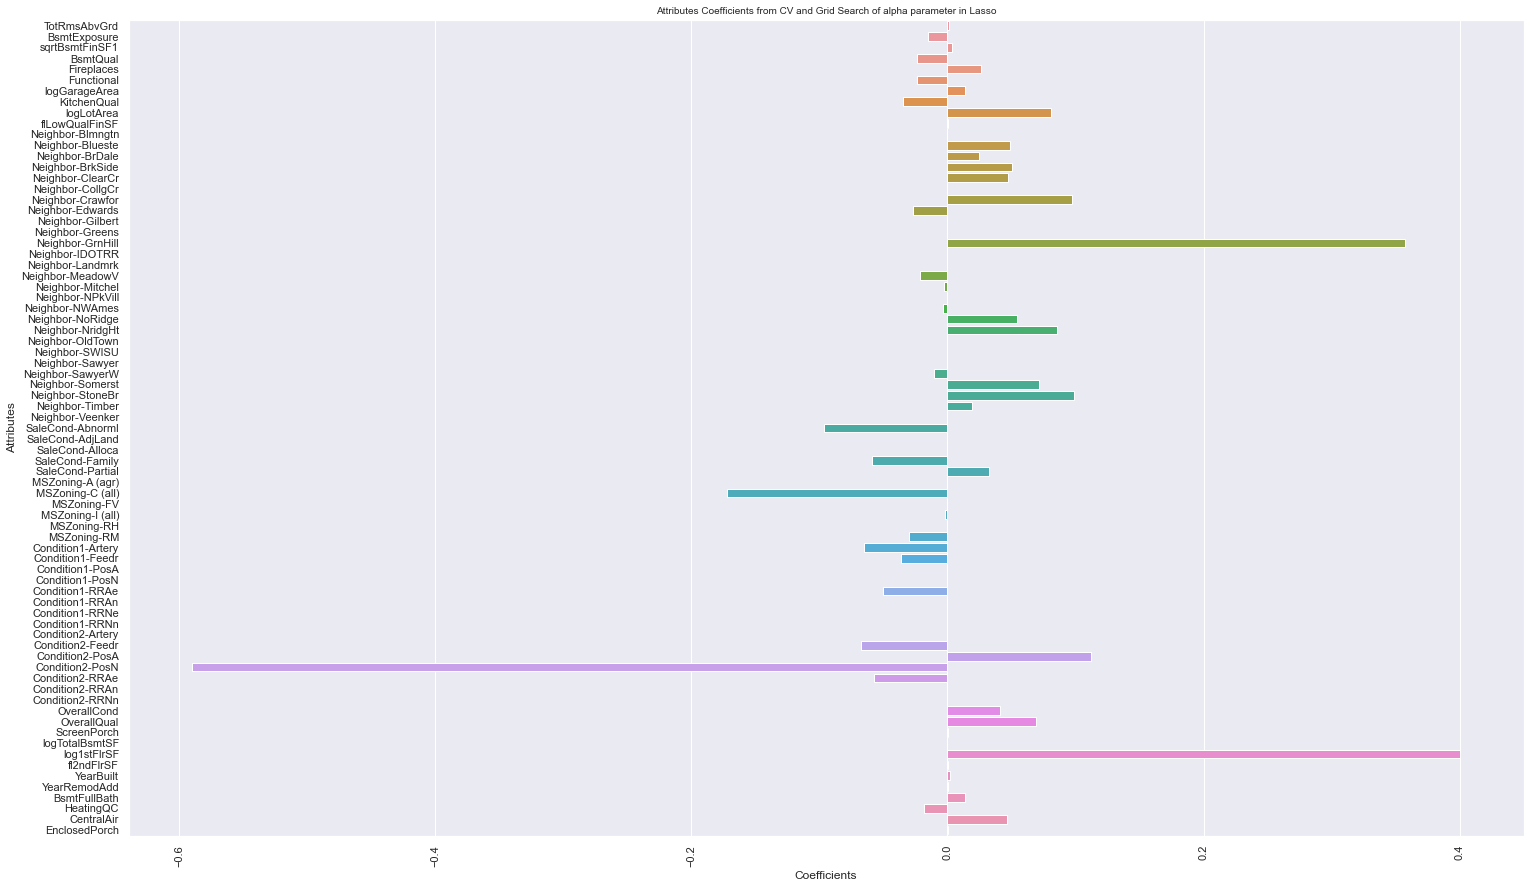

In [25]:
sns.set(rc={'figure.figsize':(25,15)})
sns.barplot(y='Attributes', x='Coefficients', data=lasso_optimalCoefs)
plt.title('Attributes Coefficients from CV and Grid Search of alpha parameter in Lasso', size =10)
plt.xticks(rotation = 90)
plt.show()

In [26]:
# Features with coeffcients that came out 0 above
lasso_optimalCoefs0 = lasso_optimalCoefs.loc[lasso_optimalCoefs['Coefficients']==0]
#lasso_optimalCoefs0

In [27]:
# 25 features have been removed by lasso, leaving 50
lasso_optimalCoefs0.shape

(25, 2)

In [28]:
# Dropped these columns from train and test sets
model73X_train = model72X_train.drop(lasso_optimalCoefs0['Attributes'].tolist(), axis = 1)
model73X_test = model72X_test.drop(lasso_optimalCoefs0['Attributes'].tolist(), axis = 1)

In [29]:
# Final MLR on the remaining features
model73 = LinearRegression()
model73.fit(model73X_train, model72y_train)

LinearRegression()

In [30]:
#Scores for train and test sets
print("R^2 for train set: %f" %model73.score(model73X_train, model72y_train))
print('-'*50)
print("R^2 for test  set: %f" %model73.score(model73X_test, model72y_test))

R^2 for train set: 0.928744
--------------------------------------------------
R^2 for test  set: 0.916935


In [31]:
# Coefficients from final model
model73Coefs = pd.DataFrame({"Attributes": model73X_train.columns, "Coefficients": model73.coef_})
#model73Coefs

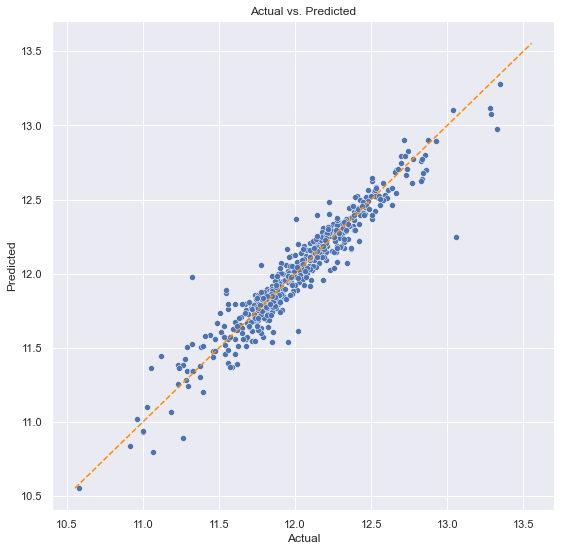

In [32]:
# Testing Linearity
sns.set(rc={'figure.figsize':(9,9)})
predictions = model73.predict(model73X_test)
results = pd.DataFrame({"Actual": model72y_test, "Predicted": predictions})
results['Residuals'] = abs(results['Actual']) - abs(results['Predicted'])
sns.scatterplot(x='Actual', y='Predicted', data=results)
line_coords = np.arange(results[['Actual', 'Predicted']].min().min(), results[['Actual', 'Predicted']].max().max()+1)
plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

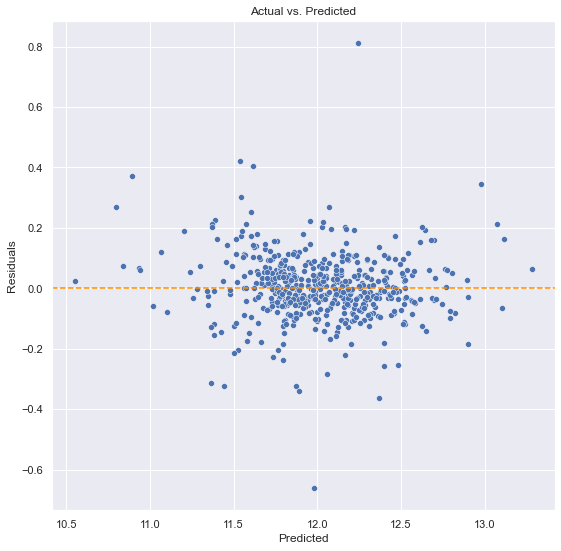

In [33]:
# Checking for constant variance
sns.scatterplot(x='Predicted', y ='Residuals', data = results)
plt.axhline(y = 0, color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mean_squared_error(np.exp(results['Actual']), np.exp(results['Predicted']), squared=False)

23179.119793034683